Разгледуваме множество податоци за два видови ориз. Целта е да умееме да ги разликуваме видовите ориз, имајќи ги предвид геометриските облици на едно зрно, добиени со помош на камера со висока резолуција. Податоците со кои располагаме се дадени во табелата подолу.

In [4]:
import pandas as pd

In [20]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [6]:
df = pd.read_csv('data/rice.csv')
df

,Area,Perimeter,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Class
0,15231,525.578979,229.749878,85.093788,0.928882,15617,0.572896,Cammeo
1,14656,494.311005,206.020065,91.730972,0.895405,15072,0.615436,Cammeo
2,14634,501.122009,214.106781,87.768288,0.912118,14954,0.693259,Cammeo
3,13176,458.342987,193.337387,87.448395,0.891861,13368,0.640669,Cammeo
4,14688,507.166992,211.743378,89.312454,0.906691,15262,0.646024,Cammeo
...,...,...,...,...,...,...,...,...
3799,11441,415.858002,170.486771,85.756592,0.864280,11628,0.681012,Osmancik
3800,11625,421.390015,167.714798,89.462570,0.845850,11904,0.694279,Osmancik
3801,12437,442.498993,183.572922,86.801979,0.881144,12645,0.626739,Osmancik
3802,9882,392.296997,161.193985,78.210480,0.874406,10097,0.659064,Osmancik


In [10]:
df_y = df['Class']
df_y
#smestuvanje na target

0         Cammeo
1         Cammeo
2         Cammeo
3         Cammeo
4         Cammeo
          ...   
3799    Osmancik
3800    Osmancik
3801    Osmancik
3802    Osmancik
3803    Osmancik
Name: Class, Length: 3804, dtype: object

In [16]:
df_x = df[['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'Eccentricity', 'ConvexArea', 'Extent']]
#delenje na podatochnoto mnozhesto na se osven target
df_x

,Area,Perimeter,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent
0,15231,525.578979,229.749878,85.093788,0.928882,15617,0.572896
1,14656,494.311005,206.020065,91.730972,0.895405,15072,0.615436
2,14634,501.122009,214.106781,87.768288,0.912118,14954,0.693259
3,13176,458.342987,193.337387,87.448395,0.891861,13368,0.640669
4,14688,507.166992,211.743378,89.312454,0.906691,15262,0.646024
...,...,...,...,...,...,...,...
3799,11441,415.858002,170.486771,85.756592,0.864280,11628,0.681012
3800,11625,421.390015,167.714798,89.462570,0.845850,11904,0.694279
3801,12437,442.498993,183.572922,86.801979,0.881144,12645,0.626739
3802,9882,392.296997,161.193985,78.210480,0.874406,10097,0.659064


### Прашања и задачи

### Задача 2.1
**(5 поени)** Зошто за алгоритамот ID3 за градење на дрво се вели дека е алчен алгоритам?

D3 се вика алчен алгоритам затоа што во секој чекор ја избира онаа карактеристика што во тој момент изгледа најдобра за поделба на податоците.

Алгоритмот не размислува однапред дали таа одлука ќе биде најдобра и за целото дрво на крај. Тој само гледа што е најдобро сега, ја прави поделбата и продолжува понатаму, без да се враќа назад.

### Задача 2.2
**(5 поени)** Подели го податочното множество на два дела. Поголемиот дел нека е 75% и ќе служи за тренирање, а помалиот дел од 25% ќе служи за проверка на повединието на алгоритмите кои ќе ги имплементираш понатаму.

In [1]:
from sklearn.model_selection import train_test_split

In [35]:
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_x, df_y, test_size=0.25, random_state=156)
df_test_x

,Area,Perimeter,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent
1792,10787,401.255005,160.017883,86.637802,0.840749,11010,0.658346
2214,10664,414.938995,168.079086,81.731415,0.873810,10929,0.645364
374,16122,539.000000,233.913513,89.531082,0.923851,16440,0.511160
3426,11923,439.713013,183.156952,83.901749,0.888908,12116,0.585926
1142,13589,483.884003,205.354752,85.410324,0.909403,13883,0.545743
...,...,...,...,...,...,...,...
1998,10583,401.309998,164.735611,82.486282,0.865610,10769,0.723476
1473,11769,426.309998,176.114594,85.902138,0.872976,11928,0.791193
3433,12005,440.265015,180.682114,85.737228,0.880245,12319,0.603024
2065,11247,419.191010,173.845490,82.959312,0.878794,11439,0.692720


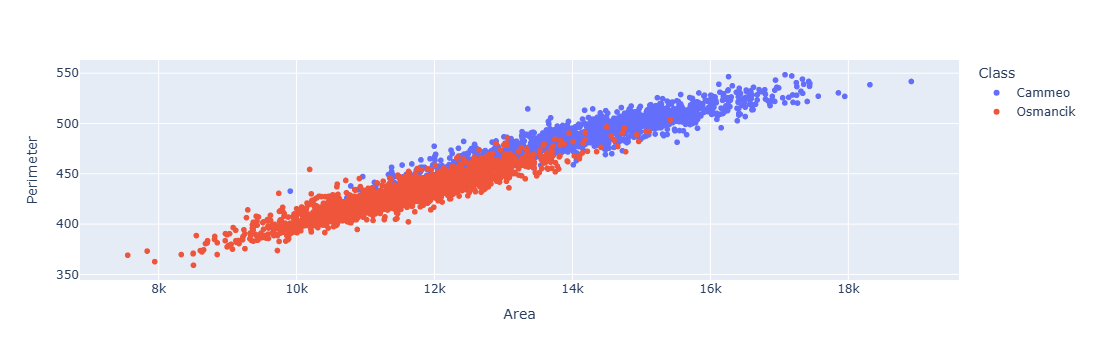

In [36]:
import plotly.express as px
px.scatter(df, x="Area", y="Perimeter", color="Class") #color e target

### Задача 2.4
**(5 поени)** Користејќи ја библиотеката `sklearn`,  вчитај класификатор - дрво за одлучување, претставен преку класата `DecisionTreeClassifier`, а потоа вметни ги податоците за тренирање од вториот чекор за да ја истренираш мрежата.

- [Пример за дрва за одлучување од sklearn](https://scikit-learn.org/stable/modules/tree.html)
- [Документација за Decision Tree Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

In [37]:
clf = DecisionTreeClassifier(criterion = 'entropy', max_depth=3)

### Задача 2.5
**(5 поени)** Пресметај ја прецизноста на алгоритамот за податоците кои тој ги нема видено (на кои нема тренирано). Потоа пресметај ја прецизноста на алгоритамот за податоците кои ги има видено (на кои има тренирано). Споредете ги резултатите. Ви изгледаат ли во ред?

In [38]:
clf.fit(df_train_x, df_train_y)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [39]:
print('Accuracy Score on train data: ', accuracy_score(y_true=df_train_y, y_pred=clf.predict(df_train_x)))
print('Accuracy Score on test data: ', accuracy_score(y_true=df_test_y, y_pred=clf.predict(df_test_x)))

Accuracy Score on train data:  0.9298983526112864
Accuracy Score on test data:  0.92534174553102


### Задача 2.6
**(5 поени) (код)** Кои зрна ориз алгоритамот успева да ги распознава подобро, големите (`Area` над просекот) или малите (`Area` под просекот)?

In [40]:
df

,Area,Perimeter,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Class
0,15231,525.578979,229.749878,85.093788,0.928882,15617,0.572896,Cammeo
1,14656,494.311005,206.020065,91.730972,0.895405,15072,0.615436,Cammeo
2,14634,501.122009,214.106781,87.768288,0.912118,14954,0.693259,Cammeo
3,13176,458.342987,193.337387,87.448395,0.891861,13368,0.640669,Cammeo
4,14688,507.166992,211.743378,89.312454,0.906691,15262,0.646024,Cammeo
...,...,...,...,...,...,...,...,...
3799,11441,415.858002,170.486771,85.756592,0.864280,11628,0.681012,Osmancik
3800,11625,421.390015,167.714798,89.462570,0.845850,11904,0.694279,Osmancik
3801,12437,442.498993,183.572922,86.801979,0.881144,12645,0.626739,Osmancik
3802,9882,392.296997,161.193985,78.210480,0.874406,10097,0.659064,Osmancik


In [45]:
df['Area'].mean()

np.float64(12667.975814931651)

In [51]:
big = df[df['Area'] > df["Area"].mean()]
small = df[df['Area'] <= df["Area"].mean()]


In [58]:
big_x = big[['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'Eccentricity', 'ConvexArea', 'Extent']]
small_x = small[['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'Eccentricity', 'ConvexArea', 'Extent']]
big_y = big['Class']
small_y = small['Class']

In [59]:
print('Accuracy Score on big_x data: ', accuracy_score(y_true=big_y, y_pred=clf.predict(big_x)))
print('Accuracy Score on small_x data: ', accuracy_score(y_true=small_y, y_pred=clf.predict(small_x)))

Accuracy Score on big_x data:  0.9241097489784005
Accuracy Score on small_x data:  0.9325681492109039


### Задача 2.7
**(5 поени)** Од кој вид се зрната ориз од податочното множество од датотеката `rice_test.csv`?

In [61]:
df_new = pd.read_csv('data/rice_test.csv')
df_new

,Area,Perimeter,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent
0,12103,456.364990,189.785934,82.760780,0.899911,12483,0.629054
1,11960,436.371002,183.816818,83.234207,0.891607,12142,0.589569
2,9487,394.279999,165.935745,73.330040,0.897055,9659,0.722984
3,12723,465.941986,197.752319,83.903000,0.905530,12974,0.683151
4,14587,497.946991,211.687286,88.913208,0.907514,14926,0.648686
5,14202,485.937988,202.614059,90.650284,0.894332,14640,0.561766


In [64]:
clf.predict(df_new)

array(['Osmancik', 'Osmancik', 'Osmancik', 'Cammeo', 'Cammeo', 'Cammeo'],
      dtype=object)

### Задача 2.8
**(5 поени)** Што би направиле ако податоците од `rice_test.csv` се непотполни. На пример, недостасуваат колоните Area и Parameter?

Одговорот `не можеме да предвидиме од кој вид се зрната` нема да носи поени.

Ако податоците од `rice_test.csv` се непотполни и недостасуваат колони како `Area` и `Perimeter`, прво би се обиделе да ги пополниме тие вредности со соодветна метода, на пример со просечна вредност или медијана пресметана од тренинг податоците. Доколку недостасуваат клучни карактеристики кои не можат веродостојно да се надоместат, тогаш тие примероци би се изоставиле или моделот би се приспособил да работи со помал број на карактеристики.


### Задача 2.9
**(5 поени)** Дали постапуваме правилно ако за нашите податоци имплементираме многу различни алгоритми, на пример над 20, и го избереме најдобриот? Дали сигурно сме го избрале најдобриот или има нешто труло во оваа постапка? Објасни.

Не баш. Иако изгледа логично да се испробаат многу алгоритми и да се избере оној со најдобар резултат, постои ризик некој модел да испадне најдобар само поради случајност. Кога сите модели се тестираат на истото тест множество, може да дојде до пренагодување кон тие податоци и да добиеме нереална слика за квалитетот. Затоа не сме сигурни дека сме го избрале навистина најдобриот модел, туку само најдобриот за тие конкретни податоци.


### Задача 2.10
**(5 поени)** Наведи три причини зошто би го избрал овој алгоритам наместо останатите алгоритми (кои ги користевме на часовите).

In [ ]:
1. Би го избрал овој алгоритам затоа што е лесен за разбирање и интерпретација, односно може јасно да се види според кои правила се носи одлуката.
2. Decision Tree работи добро со нумерички податоци без потреба од скалирање, што ја поедноставува подготовката на податоците.
3. Алгоритмот е брз и ефикасен и често дава добри резултати дури и со релативно едноставни поставки.

### Задача 2.11
**(5 поени)** Класата `DecisionTreeClassifier` има аргумент `max_depth`. Објасни на што влијае овој аргумент и објасни ја важноста на истиот.